#### Import the modules that we will use in our exploratory data analysis

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import ast
import missingno as msno 
import seaborn as sns
sns.set()

#### Load dataset

In [42]:
ML_dataset = pd.read_csv("../datasets/movies_dataset.csv")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9824\1248136670.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  ML_dataset = pd.read_csv("../datasets/movies_dataset.csv")


#### Explore dataset

In [119]:
ML_dataset.shape

(45466, 27)

In [120]:
ML_dataset.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,release_month,num_genres
0,False,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,[English],Released,NaN,Toy Story,False,7.7,5415.0,1995.0,Oct,3.0
1,False,None,65000000.0,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0,Dec,3.0
2,False,Grumpy Old Men Collection,0.0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0,Dec,2.0


In [121]:
ML_dataset.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,release_month,num_genres
45461,False,None,0.0,"[Drama, Family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,[فارسی],Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,NaN,2.0
45462,False,None,0.0,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,[],Released,NaN,Century of Birthing,False,9.0,3.0,2011.0,Nov,1.0
45463,False,None,0.0,"[Action, Drama, Thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,[English],Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003.0,Aug,3.0
45464,False,None,0.0,None,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,None,Released,NaN,Satan Triumphant,False,0.0,0.0,1917.0,Oct,NaN
45465,False,None,0.0,None,NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,[English],Released,NaN,Queerama,False,0.0,0.0,2017.0,Jun,NaN


In [122]:
ML_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45463 non-null  float64       
 3   genres                 43024 non-null  object        
 4   homepage               7782 non-null   object        
 5   id                     45466 non-null  object        
 6   imdb_id                45449 non-null  object        
 7   original_language      45455 non-null  object        
 8   original_title         45466 non-null  object        
 9   overview               45466 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45080 non-null  object        
 12  production_companies   33585 non-null  object        
 13  p

In [123]:
ML_dataset.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'release_year', 'release_month',
       'num_genres'],
      dtype='object')

#### Atributes description

In [124]:
description = pd.read_excel("../datasets/Diccionario de Datos - Movies.xlsx")
description

,Característica,Descripción
0,adult,"Indica si la película tiene califiación X, exc..."
1,belongs_to_collection,Un diccionario que indica a que franquicia o s...
2,budget,"El presupuesto de la película, en dólares"
3,genres,Un diccionario que indica todos los géneros as...
4,homepage,La página web oficial de la película
5,id,ID de la pelicula
6,imdb_id,IMDB ID de la pelicula
7,original_language,Idioma original en la que se grabo la pelicula
8,original_title,Titulo original de la pelicula
9,overview,Pequeño resumen de la película


#### Flatten nested columns (based on ETL)

In [43]:
def fetch_name(obj):      # Flatten nested columns 1
    
    if isinstance(obj, str) and "{" in obj:
        L = []
        for i in ast.literal_eval(obj):
            L.append(i["name"])
        return L

def fetch_name_2(obj):    # Flatten nested columns 2
    if isinstance(obj, str) and "{" in obj:
        dic = ast.literal_eval(obj)
        return dic["name"]

In [44]:
ML_dataset["genres"] = ML_dataset["genres"].apply(fetch_name)
ML_dataset["belongs_to_collection"] = ML_dataset["belongs_to_collection"].apply(fetch_name_2) # Use a different function based on the data type
ML_dataset["production_companies"]  = ML_dataset["production_companies"].apply(fetch_name)
ML_dataset["production_countries"]  = ML_dataset["production_countries"].apply(fetch_name)
ML_dataset["spoken_languages"] = ML_dataset["spoken_languages"].apply(fetch_name)

#### Correct atributes types (based on ETL)

In [47]:
ML_dataset["release_date"].replace("1", np.nan, inplace = True)
ML_dataset["release_date"].replace("12", np.nan, inplace = True)
fechas_datetime = pd.to_datetime(ML_dataset["release_date"], format='%Y-%m-%d', errors = 'coerce') # errors = 'coerce' -----> If 'coerce', then invalid parsing will be set as NaT.
ML_dataset["release_date"] = fechas_datetime.dropna()
ML_dataset["budget"] = pd.to_numeric(ML_dataset["budget"], errors = "coerce")
ML_dataset["popularity"] = pd.to_numeric(ML_dataset["popularity"], errors = "coerce")
ML_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45463 non-null  float64       
 3   genres                 43024 non-null  object        
 4   homepage               7782 non-null   object        
 5   id                     45466 non-null  object        
 6   imdb_id                45449 non-null  object        
 7   original_language      45455 non-null  object        
 8   original_title         45466 non-null  object        
 9   overview               44512 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45080 non-null  object        
 12  production_companies   33585 non-null  object        
 13  p

#### Number of missing values per column

In [48]:
missing = pd.concat([ML_dataset.isnull().sum(), 100 * ML_dataset.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
belongs_to_collection,40975,90.122289
homepage,37684,82.883913
tagline,25054,55.104914
production_companies,11881,26.131615
production_countries,6288,13.830115
spoken_languages,3835,8.434874
genres,2442,5.371046
overview,954,2.098271
poster_path,386,0.848986
runtime,263,0.578454


<function matplotlib.pyplot.show(close=None, block=None)>

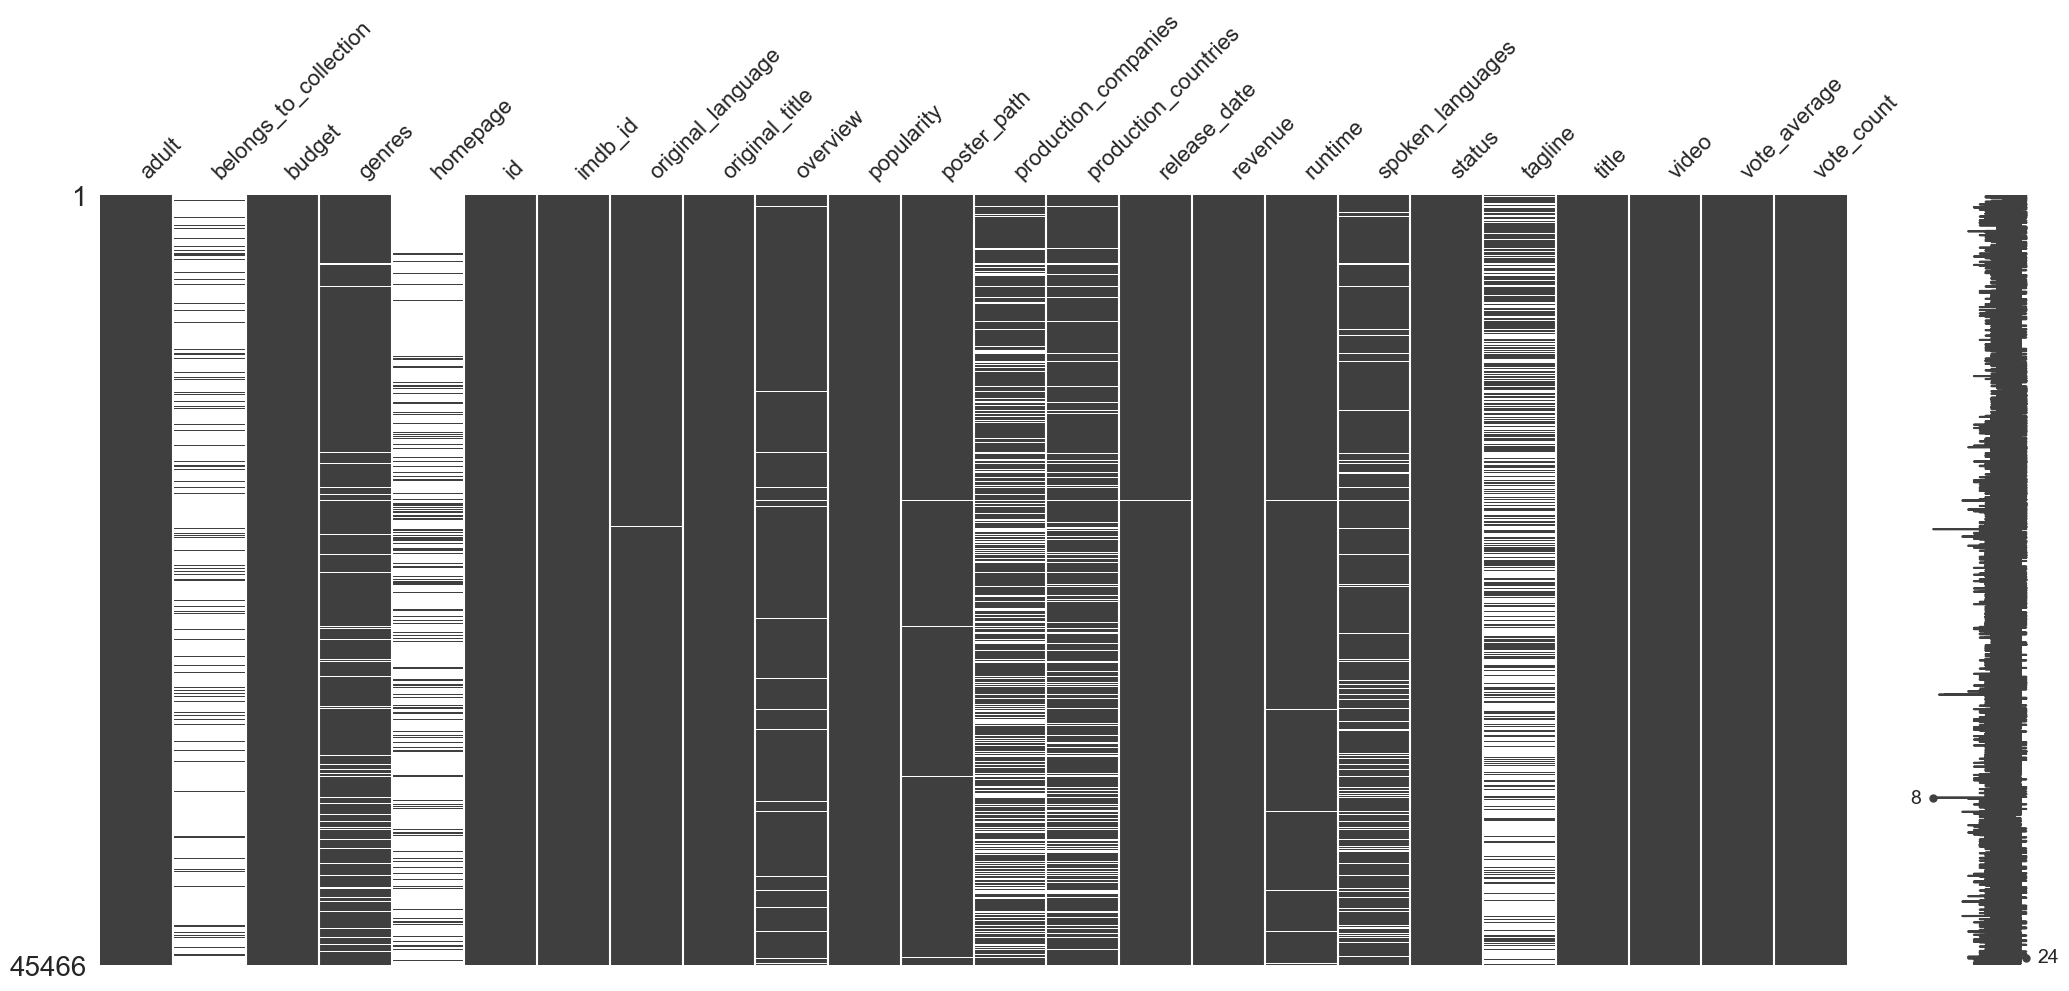

In [51]:
msno.matrix(ML_dataset)
plt.show

#### Searching for duplicated movies

In [60]:
print(len(ML_dataset["title"]))
print(ML_dataset["title"].nunique())

45466
42277


In [61]:
ML_dataset["title"].value_counts().head(15)

Cinderella              11
Hamlet                   9
Alice in Wonderland      9
Beauty and the Beast     8
Les Misérables           8
The Three Musketeers     7
Blackout                 7
A Christmas Carol        7
Treasure Island          7
King Lear                6
The Journey              6
Home                     6
Bluebeard                6
Wuthering Heights        6
The Hunters              6
Name: title, dtype: int64

#### Some movies have different versions with the same title, like remakes

In [62]:
ML_dataset[ML_dataset["title"] == "Cinderella"].head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
993,False,Cinderella Collection,2900000.0,"[Family, Fantasy, Animation, Romance]",http://movies.disney.com/cinderella-1950,11224,tt0042332,en,Cinderella,Cinderella has faith her dreams of a better li...,...,1950-03-04,263591415.0,74.0,[English],Released,The greatest love story ever told.,Cinderella,False,6.8,1760.0
13076,False,None,0.0,"[TV Movie, Family, Fantasy, Music, Romance]",NaN,42884,tt0128996,en,Cinderella,Updated version of the classic Rodgers and Ham...,...,1997-11-02,0.0,88.0,[English],Released,NaN,Cinderella,False,6.1,28.0
23507,False,None,0.0,"[Fantasy, Drama]",NaN,92349,tt0003772,en,Cinderella,Based on Charles Perrault's fairy tale: Cinder...,...,1914-12-28,0.0,52.0,[English],Released,NaN,Cinderella,False,5.4,7.0


### Look at the atributes

### Id

#### We have some movies with repeated Id

In [72]:
ML_dataset["id"].value_counts()

141971    3
168538    2
25541     2
15028     2
11115     2
         ..
72272     1
1549      1
10171     1
38996     1
461257    1
Name: id, Length: 45436, dtype: int64

#### Movie count per year 

In [63]:
ML_dataset["release_year"] = ML_dataset["release_date"].dt.year
ML_dataset["release_year"].value_counts()

2014.0    1974
2015.0    1905
2013.0    1889
2012.0    1722
2011.0    1667
          ... 
2020.0       1
1887.0       1
1878.0       1
1874.0       1
1883.0       1
Name: release_year, Length: 135, dtype: int64

#### We can observe the decrease in movies due to the pandemic

Text(0.5, 0, 'Year')

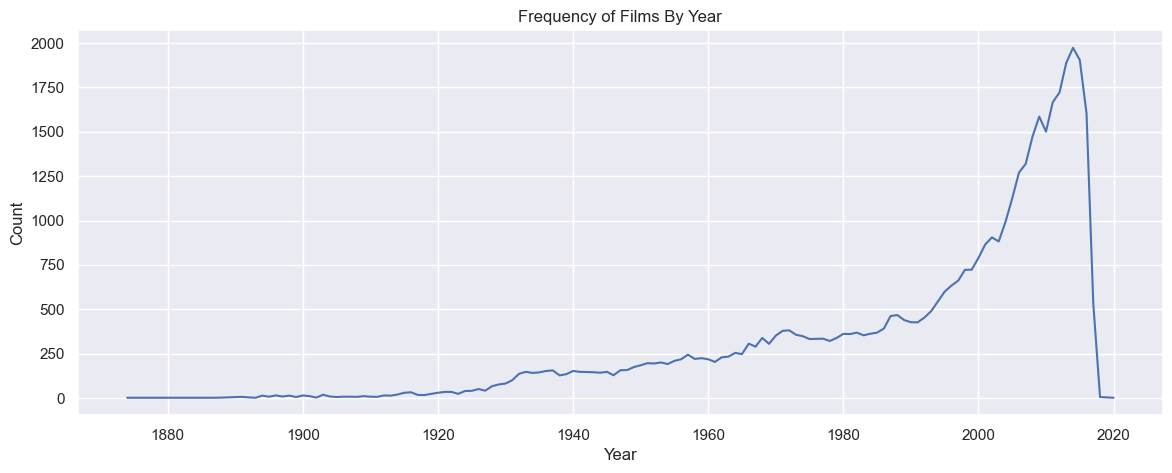

In [64]:
count_by_year = ML_dataset.groupby("release_year")["title"].count()
plt.figure(figsize = (14, 5))
count_by_year.plot()
plt.title("Frequency of Films By Year")
plt.ylabel("Count")
plt.xlabel("Year")

#### Movie count per month 

In [67]:
ML_dataset["release_month"] = ML_dataset["release_date"].dt.strftime('%b')
ML_dataset["release_month"].value_counts()

Jan    5912
Sep    4838
Oct    4615
Dec    3786
Nov    3661
Mar    3553
Apr    3453
Aug    3394
May    3339
Jun    3153
Feb    3032
Jul    2640
Name: release_month, dtype: int64

#### Between the end and the beginning of the year is a good time to watch new movies

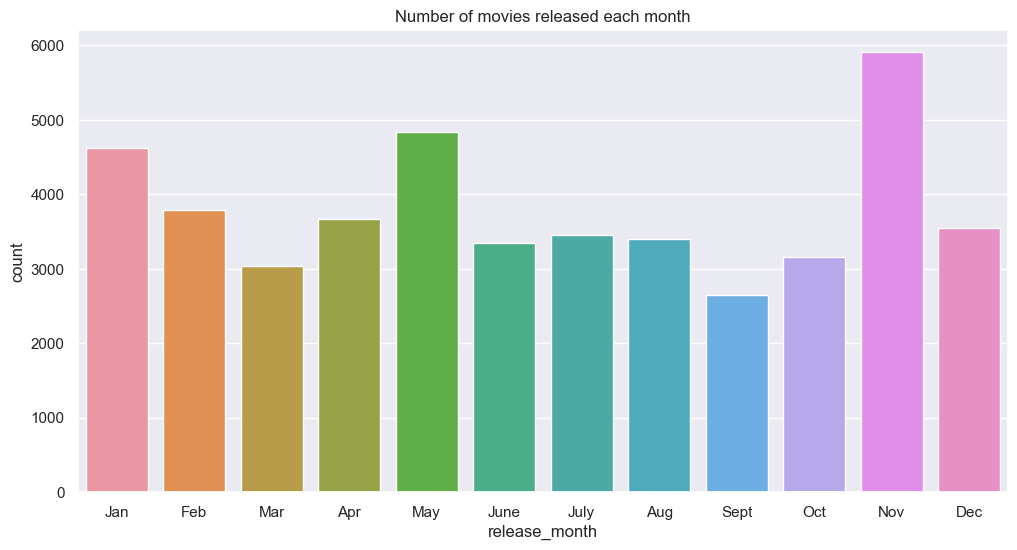

In [71]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
months = list(months)
plt.figure(figsize = (12, 6))
sns.countplot(x = "release_month", data = ML_dataset)
locs, labels = plt.xticks()
plt.title("Number of movies released each month")
plt.xticks(locs, months)
plt.show()

### Genres

#### Drama is the most popular genre

In [73]:
ML_dataset["genres"].value_counts()

[Drama]                                         5000
[Comedy]                                        3621
[Documentary]                                   2723
[Drama, Romance]                                1301
[Comedy, Drama]                                 1135
                                                ... 
[TV Movie, Animation, Family, Comedy]              1
[Fantasy, Documentary, Animation, Drama]           1
[Fantasy, Mystery, Romance]                        1
[Animation, Action, Family, Science Fiction]       1
[Family, Animation, Romance, Comedy]               1
Name: genres, Length: 4068, dtype: int64

#### Check how many genres each movie has

In [77]:
ML_dataset["num_genres"] = ML_dataset["genres"].str.len()
ML_dataset[["title", "num_genres"]]

,title,num_genres
0,Toy Story,3.0
1,Jumanji,3.0
2,Grumpier Old Men,2.0
3,Waiting to Exhale,3.0
4,Father of the Bride Part II,1.0
...,...,...
45461,Subdue,2.0
45462,Century of Birthing,1.0
45463,Betrayal,3.0
45464,Satan Triumphant,NaN


In [78]:
ML_dataset["num_genres"].value_counts()

1.0    14559
2.0    14480
3.0     9586
4.0     3380
5.0      835
6.0      157
7.0       24
8.0        3
Name: num_genres, dtype: int64

### Numerical data summary

#### Atributes budget and revenue have a lot of zeros

In [79]:
ML_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,45463.0,4.224579e+06,1.742413e+07,0.0,0.000000,0.000000,0.000000,3.800000e+08
popularity,45460.0,2.921478e+00,6.005414e+00,0.0,0.385948,1.127685,3.678902,5.474883e+02
revenue,45460.0,1.120935e+07,6.433225e+07,0.0,0.000000,0.000000,0.000000,2.787965e+09
runtime,45203.0,9.412820e+01,3.840781e+01,0.0,85.000000,95.000000,107.000000,1.256000e+03
vote_average,45460.0,5.618207e+00,1.924216e+00,0.0,5.000000,6.000000,6.800000,1.000000e+01
vote_count,45460.0,1.098973e+02,4.913104e+02,0.0,3.000000,10.000000,34.000000,1.407500e+04
release_year,45376.0,1.991881e+03,2.405536e+01,1874.0,1978.000000,2001.000000,2010.000000,2.020000e+03
num_genres,43024.0,2.117562e+00,1.054115e+00,1.0,1.000000,2.000000,3.000000,8.000000e+00


### Number of movies per country

#### Most of the movies were produced in United States

In [83]:
movies_by_country = pd.DataFrame(ML_dataset["production_countries"].value_counts())
movies_by_country["Country"] = movies_by_country.index
movies_by_country.columns = ["Number of movies", "Country"] 
movies_by_country = movies_by_country.reset_index().drop("index", axis = 1)
movies_by_country

,Number of movies,Country
0,17851,[United States of America]
1,2238,[United Kingdom]
2,1654,[France]
3,1356,[Japan]
4,1030,[Italy]
...,...,...
2384,1,"[Romania, United Kingdom, Canada]"
2385,1,"[Finland, Germany, Netherlands]"
2386,1,"[France, Denmark, Spain, Sweden]"
2387,1,"[France, United States of America, Canada]"


### Number of movies per language

#### As stated above, most of movies were shot in English

In [84]:
num_lang = pd.DataFrame(ML_dataset["original_language"].value_counts())
num_lang.columns = ["Number of movies"]
num_lang

,Number of movies
en,32269
fr,2438
it,1529
ja,1350
de,1080
...,...
zu,1
qu,1
104.0,1
la,1


#### Top 10 languages

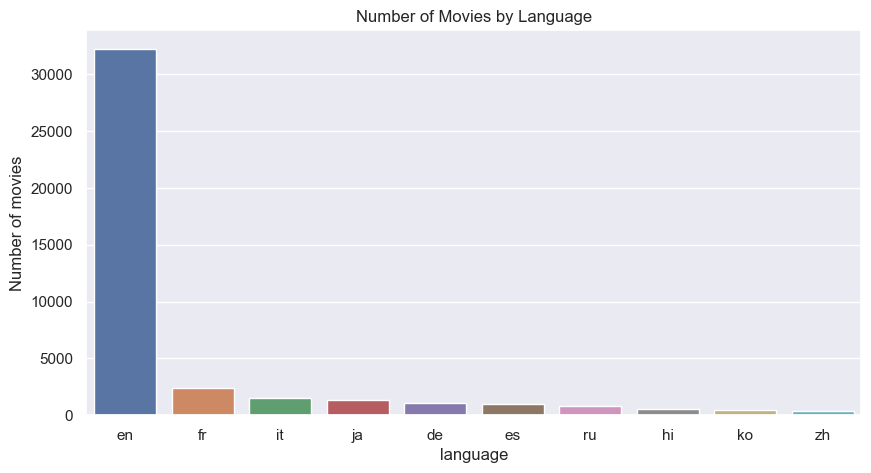

In [85]:
num_lang["language"] = num_lang.index
plt.figure(figsize= (10, 5))
sns.barplot(x = "language", y = "Number of movies", data = num_lang.iloc[0:10])
plt.title("Number of Movies by Language")
plt.show()

#### Popularity

<Axes: ylabel='Frequency'>

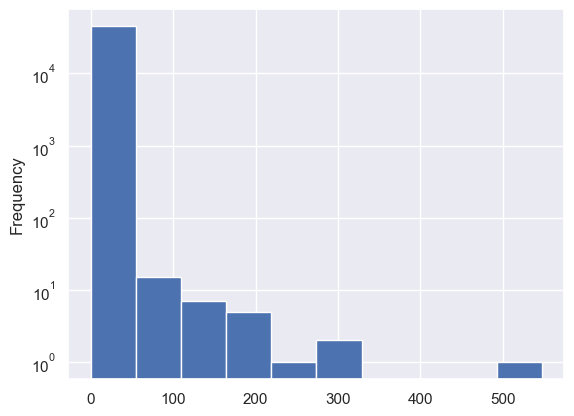

In [86]:
ML_dataset["popularity"].plot(logy = True, kind = "hist")

#### Lot of popular movies from 2017

In [90]:
ML_dataset[["title", "popularity", "release_date"]].sort_values("popularity", ascending = False).head(10)

,title,popularity,release_date
30700,Minions,547.488298,2015-06-17
33356,Wonder Woman,294.337037,2017-05-30
42222,Beauty and the Beast,287.253654,2017-03-16
43644,Baby Driver,228.032744,2017-06-28
24455,Big Hero 6,213.849907,2014-10-24
26564,Deadpool,187.860492,2016-02-09
26566,Guardians of the Galaxy Vol. 2,185.330992,2017-04-19
14551,Avatar,185.070892,2009-12-10
24351,John Wick,183.870374,2014-10-22
23675,Gone Girl,154.801009,2014-10-01


### Vote count

#### Many people want to say something about this movies

In [92]:
ML_dataset[["title", "vote_count"]].sort_values("vote_count", ascending = False).head(10)

,title,vote_count
15480,Inception,14075.0
12481,The Dark Knight,12269.0
14551,Avatar,12114.0
17818,The Avengers,12000.0
26564,Deadpool,11444.0
22879,Interstellar,11187.0
20051,Django Unchained,10297.0
23753,Guardians of the Galaxy,10014.0
2843,Fight Club,9678.0
18244,The Hunger Games,9634.0


### Revenue

#### Movies with the highest revenue

In [96]:
ML_dataset[ML_dataset["revenue"] > 0][["title", "revenue", "release_date"]].sort_values("revenue", ascending = False).head(10)

,title,revenue,release_date
14551,Avatar,2.787965e+09,2009-12-10
26555,Star Wars: The Force Awakens,2.068224e+09,2015-12-15
1639,Titanic,1.845034e+09,1997-11-18
17818,The Avengers,1.519558e+09,2012-04-25
25084,Jurassic World,1.513529e+09,2015-06-09
28830,Furious 7,1.506249e+09,2015-04-01
26558,Avengers: Age of Ultron,1.405404e+09,2015-04-22
17437,Harry Potter and the Deathly Hallows: Part 2,1.342000e+09,2011-07-07
22110,Frozen,1.274219e+09,2013-11-27
42222,Beauty and the Beast,1.262886e+09,2017-03-16


### Cost

#### The Pirates of the Caribbean franchise has the most expensive movies

In [99]:
ML_dataset[ML_dataset["budget"] > 0][["title", "budget"]].sort_values("budget", ascending = False).head(10)

,title,budget
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0
11827,Pirates of the Caribbean: At World's End,300000000.0
26558,Avengers: Age of Ultron,280000000.0
11067,Superman Returns,270000000.0
44842,Transformers: The Last Knight,260000000.0
16130,Tangled,260000000.0
18685,John Carter,260000000.0
11780,Spider-Man 3,258000000.0
21175,The Lone Ranger,255000000.0
22059,The Hobbit: The Desolation of Smaug,250000000.0


### Movie duration

#### The longest movie its actually a mini serie
#### - Take a look: https://www.imdb.com/title/tt0076993/
#### - Note that the imdb_id in the database is the same as on the IMDb website

In [103]:
ML_dataset[ML_dataset["runtime"] > 0][["title", "runtime", "imdb_id"]].sort_values("runtime", ascending = False).head(10)

,title,runtime,imdb_id
24178,Centennial,1256.0,tt0076993
40938,Baseball,1140.0,tt0108700
19965,Jazz,1140.0,tt0221300
13767,Berlin Alexanderplatz,931.0,tt0080196
13953,Heimat: A Chronicle of Germany,925.0,tt0087400
27855,The Story of Film: An Odyssey,900.0,tt2044056
26682,Taken,877.0,tt0289830
19158,The War,874.0,tt0996994
34667,The Roosevelts: An Intimate History,840.0,tt3400010
34732,Seventeen Moments in Spring,840.0,tt0069628


#### Create wordclouds and see the most frequent words in the overviews and titles

In [106]:
ML_dataset["title"] = ML_dataset["title"].astype(str)        # Columns as strings and fill variables
ML_dataset["overview"] = ML_dataset["overview"].astype(str)
title_words = ' '.join(ML_dataset["title"])
overview_words = ' '.join(ML_dataset["overview"])

#### Create titles word cloud

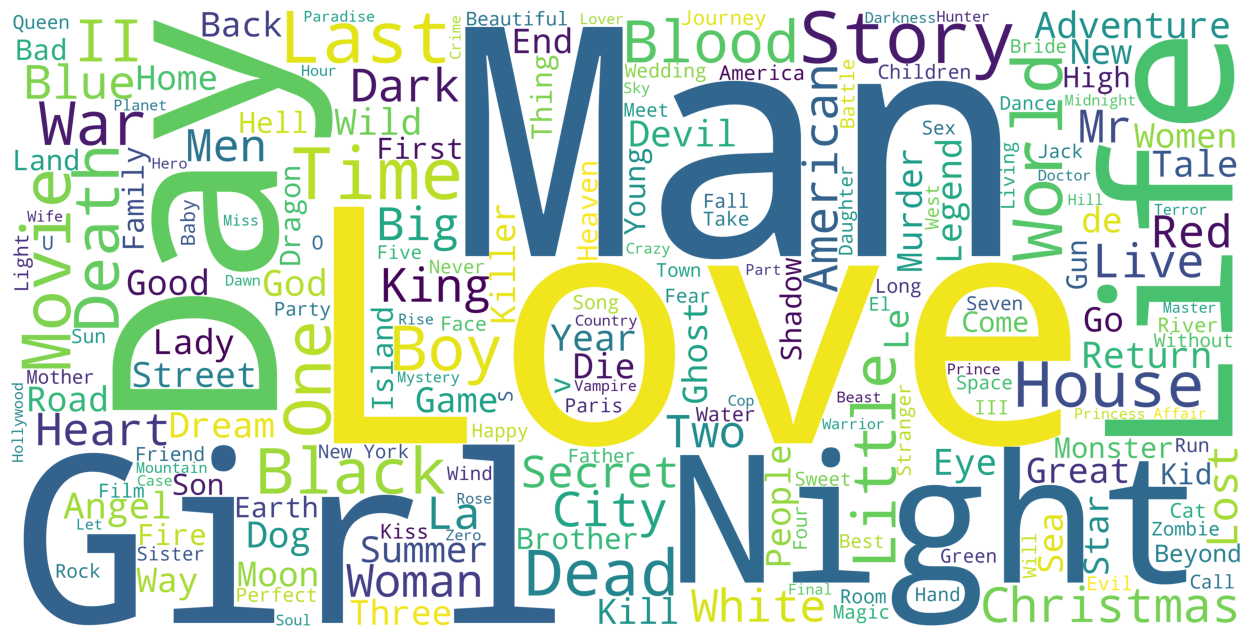

In [107]:
title_cloud = WordCloud(stopwords = STOPWORDS, background_color = "white", height = 2000, width = 4000).generate(title_words)
plt.figure(figsize = (16, 8))
plt.imshow(title_cloud)
plt.axis("off")
plt.show()

#### Create overviews word cloud

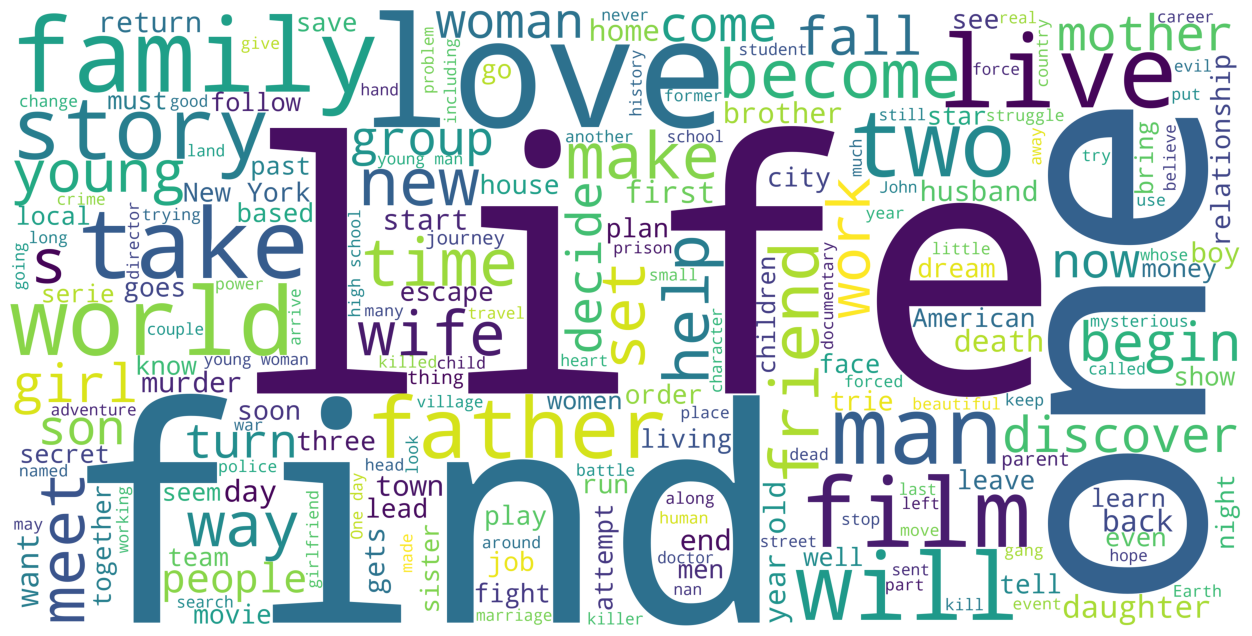

In [108]:
cloud_overview = WordCloud(stopwords = STOPWORDS, background_color = "white", height = 2000, width = 4000).generate(overview_words)
plt.figure(figsize = (16, 8))
plt.imshow(cloud_overview)
plt.axis("off")
plt.show()

#### We have many movies with a significant number of votes and good averages, which is an interesting metric

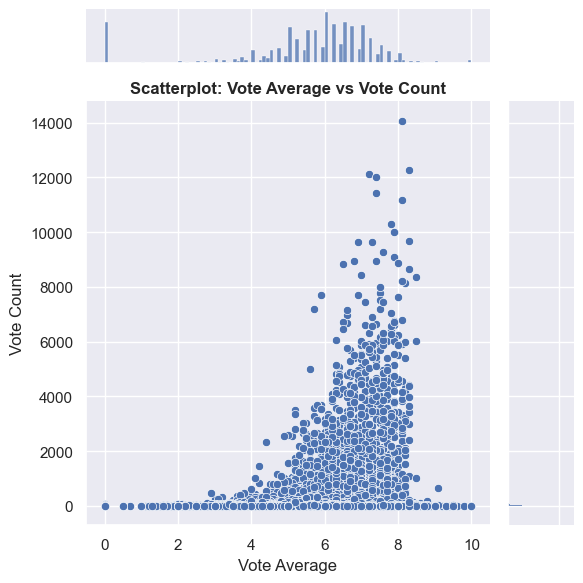

In [110]:
title = "Scatterplot: Vote Average vs Vote Count"
h = sns.jointplot(x = "vote_average", y = "vote_count", data = ML_dataset)
h.set_axis_labels("Vote Average", "Vote Count")
h.ax_joint.set_title("Scatterplot: Vote Average vs Vote Count", fontweight = "bold")
h.ax_marg_y.grid("on") 
plt.tight_layout()

### Heatmap

#### - Note the low correlation between vote_average and vote_count

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9824\244601394.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ML_dataset.corr()


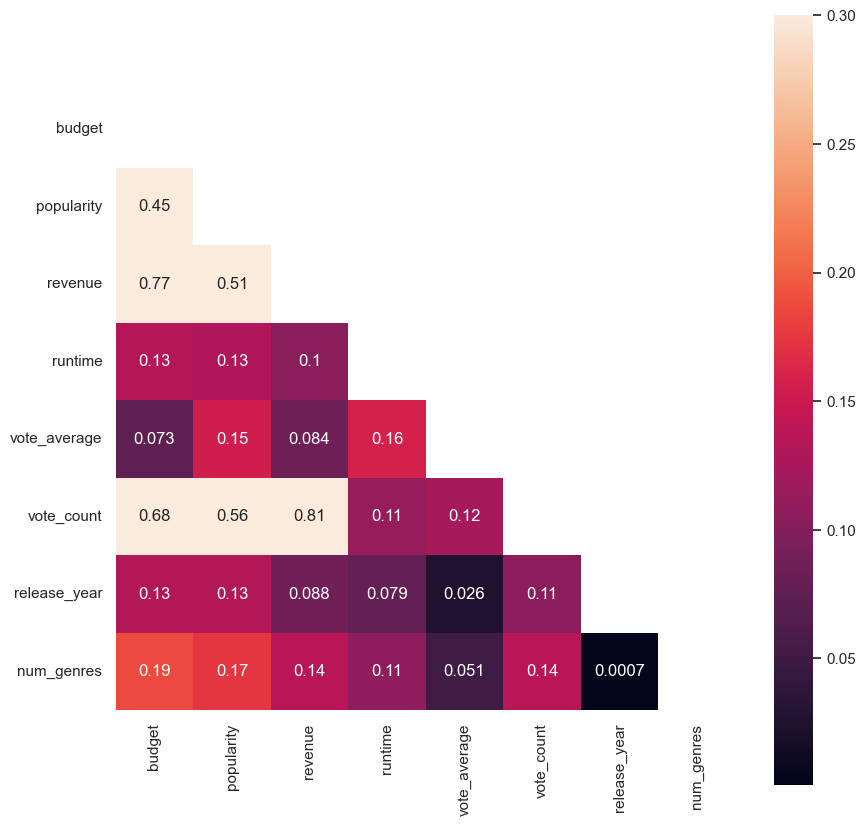

In [109]:
sns.set(font_scale = 1)
corr = ML_dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize = (10, 10))
    sns.heatmap(corr, mask = mask, vmax = .3, square = True, annot = True)

In [111]:
ML_dataset.corr()["vote_average"].sort_values(ascending = False)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9824\350451100.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ML_dataset.corr()["vote_average"].sort_values(ascending = False)


vote_average    1.000000
runtime         0.158146
popularity      0.154399
vote_count      0.123607
revenue         0.083868
budget          0.073494
num_genres      0.051105
release_year    0.026138
Name: vote_average, dtype: float64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9824\1437191387.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ML_dataset[["vote_average", "vote_count"]].hist(ax = ax)


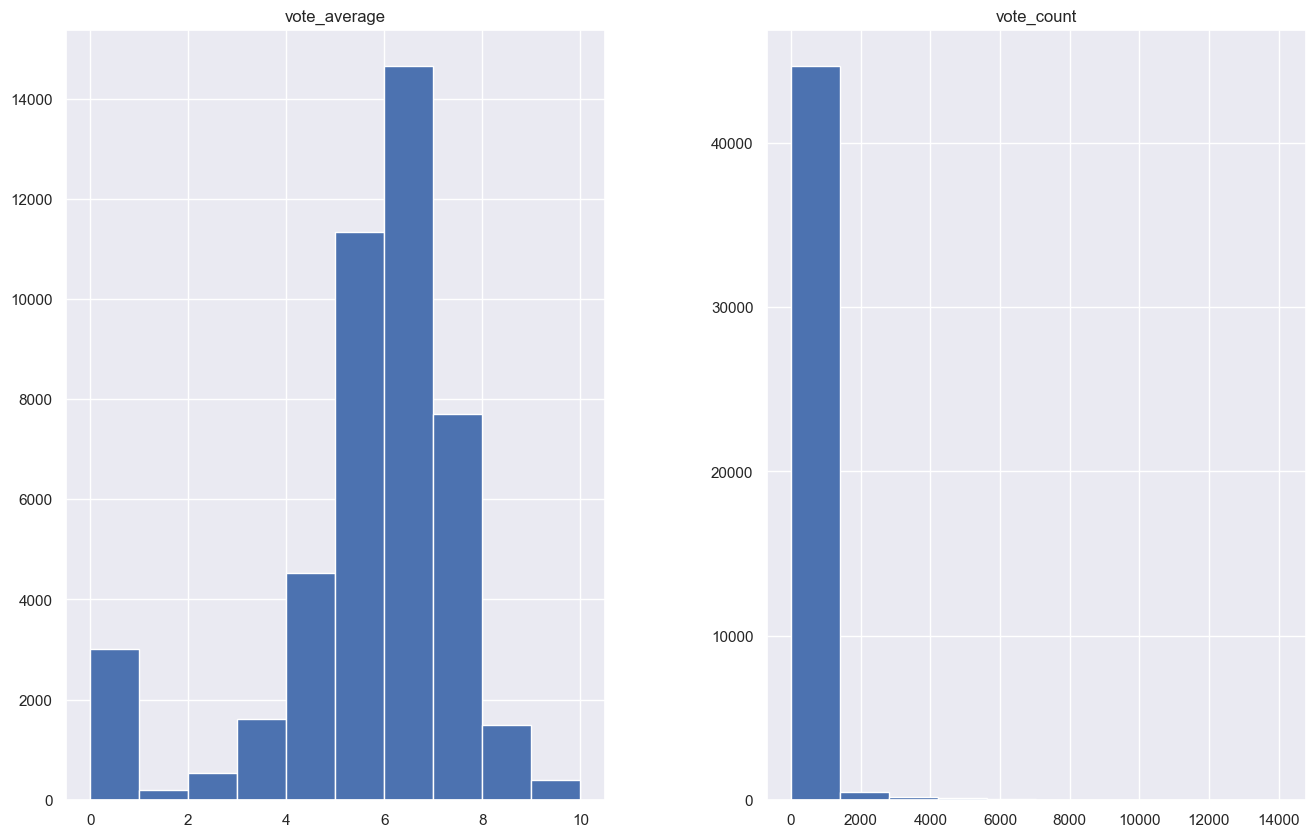

In [114]:
fig, ax = plt.subplots(figsize = (16, 10))
ML_dataset[["vote_average", "vote_count"]].hist(ax = ax) 
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9824\1440278110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ML_dataset["vote_average"])


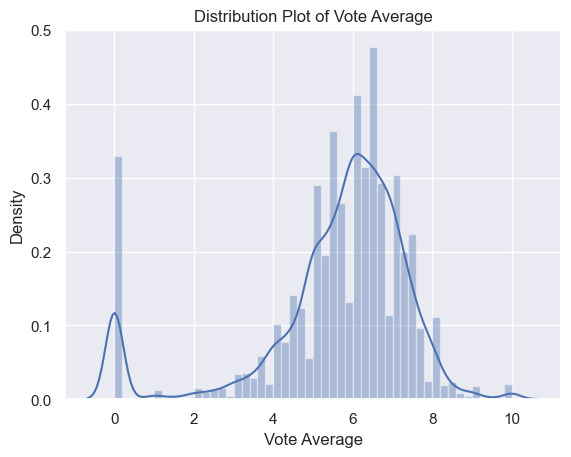

In [118]:
sns.distplot(ML_dataset["vote_average"])
plt.title("Distribution Plot of Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Density")
plt.show()